In [1]:
from math import *
from dataclasses import dataclass
from emlib import mathlib
from math import pi
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

In [2]:
@dataclass
class Point:
    name: str
    x: float
    y: float
   

In [3]:
A = Point('A', 0, 0)
E = Point('E', 1, 0)
I = Point('I', 0.5, 0.5)
O = Point('O', 0, 1)
U = Point('U', 1, 1)


In [23]:
points = [A, E, I, O, U]


[0.7071067811865476, 0.7071067811865476, 0.7071067811865476, 0.7071067811865476, 0.7071067811865476]


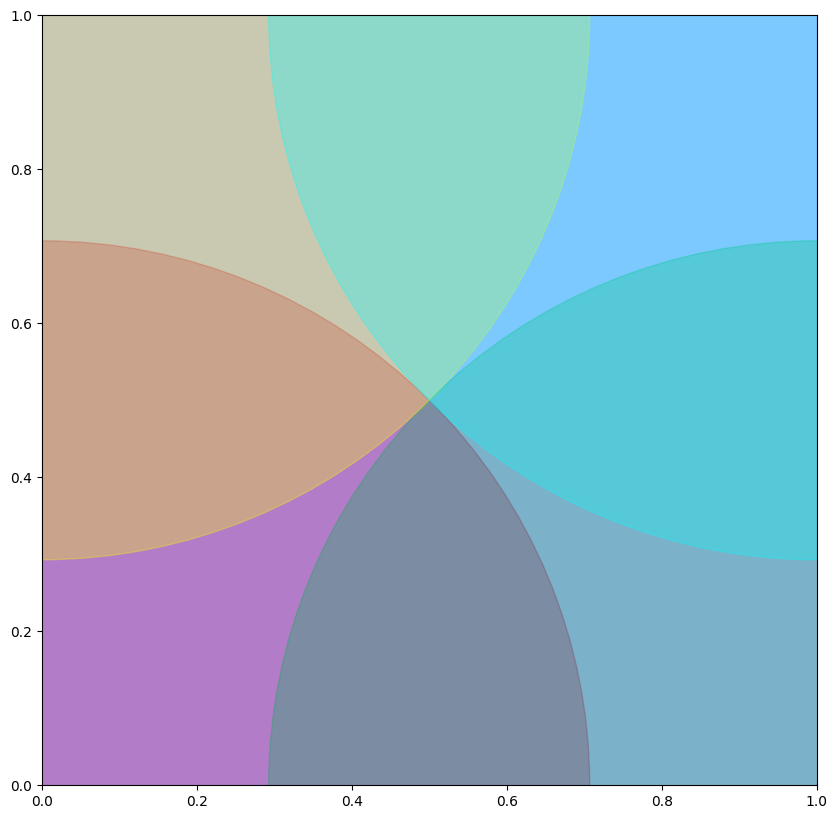

In [24]:
def distance(p0, p1):
    return sqrt((p1.x - p0.x)**2 + (p1.y-p0.y)**2)

def nearestDistance(p1, candidates):
    return min(distance(p, p1) for p in candidates if p != p1)

def calculateRadius(point, others):
    return max(nearestDistance(point, others), 0.3)

def calculateWeight(point, cursor):
    if (point.x, point.y) == (cursor.x, cursor.y):
        return 1
    pointRadius = calculateRadius(point, points)
    cursorRadius = calculateRadius(cursor, points)
    dist = distance(point, cursor)
    intersection = pointRadius + cursorRadius - dist
    return intersection / pointRadius
    
    
def calculateWeights(cursor, clamp=0.):
    radii = [calculateRadius(p, points) for p in points]
    # print("radii", radii)
    weights = [max(0, calculateWeight(p, cursor)) for p in points]
    sumweights = sum(weights)
    if sumweights == 0:
        return weights
    relweights = [w/sumweights for w in weights]
    if not clamp:
        return relweights
    avg = 1/len(relweights)
    validweights = [w if w >= (avg*clamp) else 0 for w in relweights]
    sumvalid = sum(validweights)
    return [w/sumvalid for w in validweights]
    
    
def draw(points):
    fig, ax = plt.subplots(figsize=(10, 10))
    radii = [calculateRadius(p, points) for p in points]
    colors = ['#ff0000', '#00ff00', '#0000ff', '#ffff00', '#00ffff']
    print(radii)
    circles = [Circle((p.x, p.y), r) for p, r in zip(points, radii)]
    for circle, color in zip(circles, colors):
        coll = PatchCollection([circle], alpha=0.3, color=color)
        ax.add_collection(coll)
        # ax.add_patch(circle)
    #coll = PatchCollection(circles, alpha=0.1)
    #ax.add_collection(coll)
    plt.show()
    
draw(points)

In [6]:
ws = calculateWeights(Point('x', 0.5, 0.5), clamp=0)
ws

[0.0, 0.0, 1.0, 0.0, 0.0]